# AUE Data Analyzation

In [51]:
import pandas as pd
import glob

In [52]:
# Extract and combine all response csv's
path = '.' # use your path
all_files = glob.glob(path + "/*_responses.csv")

li = []
for filename in all_files:
  df = pd.read_csv(filename, index_col = None, header = 0)
  li.append(df)

df_allData = pd.concat(li, axis=0, ignore_index = True)
display(df_allData)
# df_allData.to_csv("all_responses.csv")

,Method,Timestamp,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,3D Auth,7/13/2021 17:15:49,4,6,1,2,4,5,5,3,...,3,3,3,5,2,3,3,2,2,6
1,3D Auth,7/13/2021 17:49:00,5,7,2,1,4,5,5,3,...,3,3,3,6,1,3,2,3,2,5
2,3D Auth,7/13/2021 21:54:49,3,5,1,1,3,5,6,7,...,4,2,5,5,3,5,5,4,2,7
3,3D Auth,7/13/2021 22:14:56,5,7,2,1,3,4,4,6,...,4,4,4,7,2,4,1,3,4,4
4,3D Auth,7/13/2021 23:03:29,5,5,2,2,3,4,5,5,...,4,2,3,5,3,5,3,3,3,7
5,3D Auth,7/13/2021 23:43:22,6,7,1,1,1,7,7,7,...,1,1,1,6,1,4,7,1,1,7
6,3D Auth,7/14/2021 0:32:49,7,7,1,1,5,6,6,7,...,5,3,3,3,2,6,3,2,4,4
7,3D Auth,7/15/2021 16:52:53,6,6,2,1,3,6,7,5,...,3,2,4,5,4,3,4,2,2,7
8,3D Auth,7/15/2021 17:37:12,5,5,2,1,3,5,5,3,...,4,3,6,5,3,4,3,2,2,6
9,3D Auth,7/15/2021 17:50:38,5,6,3,1,2,1,5,4,...,2,6,6,1,2,6,1,3,2,6


In [79]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np


{'bodies': [<matplotlib.collections.PolyCollection at 0x22427920b80>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x22427920b20>,
 'cmins': <matplotlib.collections.LineCollection at 0x224279746a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x22427974e80>}

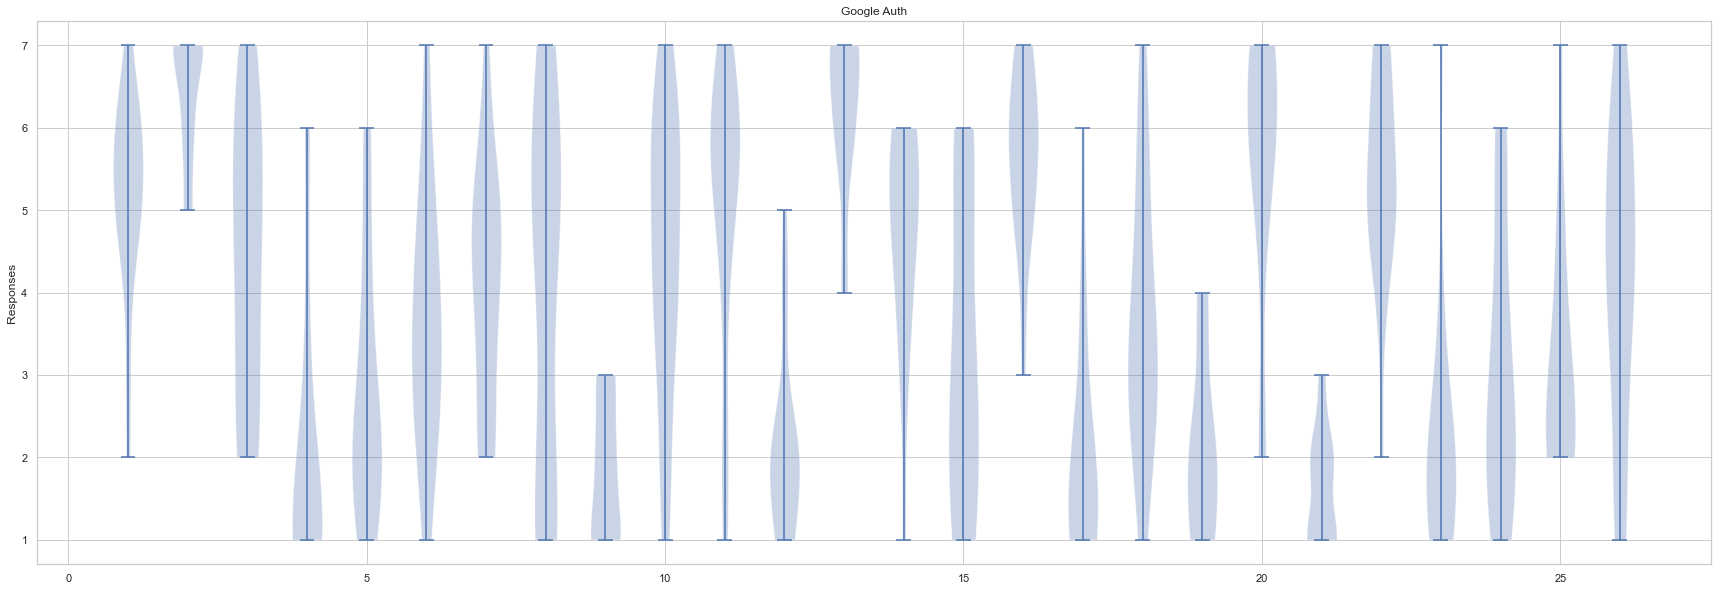

In [105]:
# Violin Graph Google Auth
fig, (ax1) = plt.subplots(figsize=(30, 10))
df_google = df_allData[df_allData['Method'] == "Google Auth"].loc[:, str(1): str(26)].values

ax1.set_title('Google Auth')
ax1.set_ylabel('Responses')
ax1.violinplot(df_google)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2242703faf0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x224279b55e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x224283064c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x22428306ca0>}

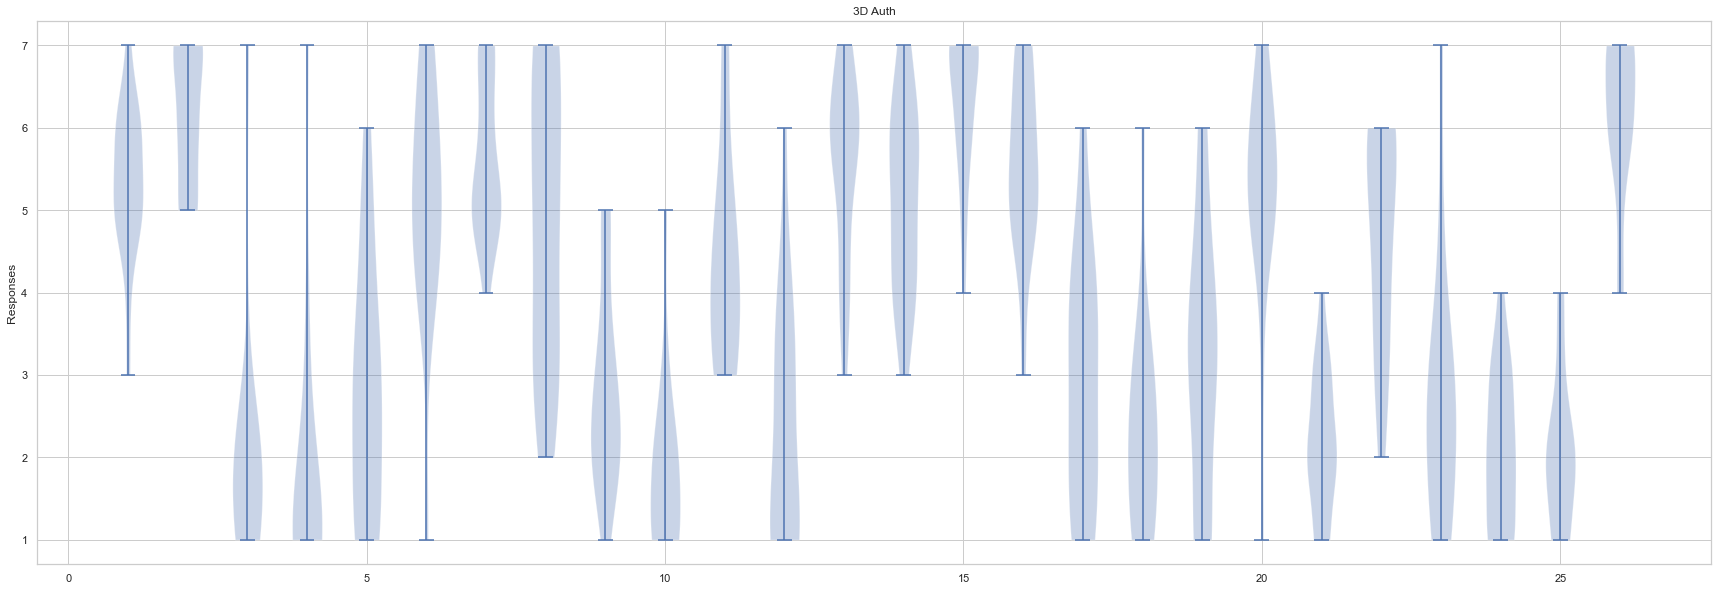

In [107]:
# Violin Graph §D Auth
fig, (ax2) = plt.subplots(figsize=(30, 10))
df_3d = df_allData[df_allData['Method'] == "3D Auth"].loc[:, str(1): str(26)].values

ax2.set_title('3D Auth')
ax2.set_ylabel('Responses')
ax2.violinplot(df_3d)